# <u>Perämeri</u>

*Versio 0.1 - Kehityksen alla*

Ilmastokeskusteluun ja sääilmiöiden ymmärtämiseen tarvitaan havaintoja monista eri suureista. Näitä ovat esimerkiksi vedenkorkeus merellä, lämpötila vedessä ja ilmassa, sateen ja lumen määrät, tuulisuus ynnä muut.

Ilmatieteenlaitos tarjoaa näihin tarpeisiin laajan valikoiman tilastoja. Kaikki alla olevat materiaalit on haettu 24.4.2025 Havaintojen lataus -portaalista [https://www.ilmatieteenlaitos.fi/havaintojen-lataus](https://www.ilmatieteenlaitos.fi/havaintojen-lataus).

Yleiseen katseluun ja kauniisti kartalle aseteltuun grafiikkaan pääsee käsiksi esimerkiksi [https://www.aaltopoiju.fi/](https://www.aaltopoiju.fi/) sivun avulla.

## 1. Työkalut

In [14]:
# Aja tämä solu aina ensimmäisenä!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2. Aineistot

Tämä kirjanen on suunniteltu Kokkolan ympärysalueelle. Kunkin suureen mittauspaikka on pyritty valitsemaan mahdollisimman läheltä kaupunkia sikäli mikäli aineistoa on ollut ITL:n sivuilla saatavilla.

In [2]:
# Pietarsaaren Leppäluoto
# Mareografinen vedenkorkeuden mittaus
# Vuosia valittu muutamia väliltä 1971-2024

leppa241 = pd.read_csv("https://github.com/opendata-education/Tyopajat/raw/refs/heads/main/materiaali/data/Pietarsaari_Leppaluoto241.csv", sep = ",")
leppa242 = pd.read_csv("https://github.com/opendata-education/Tyopajat/raw/refs/heads/main/materiaali/data/Pietarsaari_Leppaluoto242.csv", sep = ",")
leppa211 = pd.read_csv("https://github.com/opendata-education/Tyopajat/raw/refs/heads/main/materiaali/data/Pietarsaari_Leppaluoto211.csv", sep = ",")
leppa212 = pd.read_csv("https://github.com/opendata-education/Tyopajat/raw/refs/heads/main/materiaali/data/Pietarsaari_Leppaluoto212.csv", sep = ",")
leppa11 = pd.read_csv("https://github.com/opendata-education/Tyopajat/raw/refs/heads/main/materiaali/data/Pietarsaari_Leppaluoto11.csv", sep = ",",
                   parse_dates = {"Aika":["Vuosi", "Kuukausi", "Päivä", "Aika [Paikallinen aika]"]}, keep_date_col = True)
leppa01 = pd.read_csv("https://github.com/opendata-education/Tyopajat/raw/refs/heads/main/materiaali/data/Pietarsaari_Leppaluoto01.csv", sep = ",",
                   parse_dates = {"Aika":["Vuosi", "Kuukausi", "Päivä", "Aika [Paikallinen aika]"]}, keep_date_col = True)
leppa91 = pd.read_csv("https://github.com/opendata-education/Tyopajat/raw/refs/heads/main/materiaali/data/Pietarsaari_Leppaluoto91.csv", sep = ",",
                   parse_dates = {"Aika":["Vuosi", "Kuukausi", "Päivä", "Aika [Paikallinen aika]"]}, keep_date_col = True)
leppa81 = pd.read_csv("https://github.com/opendata-education/Tyopajat/raw/refs/heads/main/materiaali/data/Pietarsaari_Leppaluoto81.csv", sep = ",",
                   parse_dates = {"Aika":["Vuosi", "Kuukausi", "Päivä", "Aika [Paikallinen aika]"]}, keep_date_col = True)
leppa71 = pd.read_csv("https://github.com/opendata-education/Tyopajat/raw/refs/heads/main/materiaali/data/Pietarsaari_Leppaluoto71.csv", sep = ",",
                   parse_dates = {"Aika":["Vuosi", "Kuukausi", "Päivä", "Aika [Paikallinen aika]"]}, keep_date_col = True)

# Yhdistetään tiedot yhteen muuttujaan

leppa = pd.concat([leppa71, leppa81, leppa91, leppa01, leppa11, leppa211, leppa212, leppa241, leppa242])

# Korjataan äskeisen liitoksen rivien järjestysluvut estetiikan nimissä.

leppa = leppa.reset_index(drop = True)

In [3]:
# Perämeren aaltopoiju ja Kalajoen Maakalla
# Veden lämpötilamittaukset
# 2010-luvulta alkaen

per = pd.read_csv("https://github.com/opendata-education/Tyopajat/raw/refs/heads/main/materiaali/data/Perameri_aaltopoiju1224.csv", sep = ",",
                   parse_dates = {"Aika":["Vuosi", "Kuukausi", "Päivä", "Aika [Paikallinen aika]"]}, keep_date_col = True)
maak = pd.read_csv("https://github.com/opendata-education/Tyopajat/raw/refs/heads/main/materiaali/data/Kalajoki_Maakalla1224.csv", sep = ",",
                   parse_dates = {"Aika":["Vuosi", "Kuukausi", "Päivä", "Aika [Paikallinen aika]"]}, keep_date_col = True)

In [4]:
# Kokkolan Tankar
# Ilman lämpötila ja tuulen nopeus
# Kyseiset suureet 1990-luvulta alkaen

tank90 = pd.read_csv("https://github.com/opendata-education/Tyopajat/raw/refs/heads/main/materiaali/data/Kokkola_Tankar90.csv", sep = ",",
                   parse_dates = {"Aika":["Vuosi", "Kuukausi", "Päivä", "Aika [Paikallinen aika]"]}, keep_date_col = True)
tank00 = pd.read_csv("https://github.com/opendata-education/Tyopajat/raw/refs/heads/main/materiaali/data/Kokkola_Tankar00.csv", sep = ",",
                   parse_dates = {"Aika":["Vuosi", "Kuukausi", "Päivä", "Aika [Paikallinen aika]"]}, keep_date_col = True)
tank10 = pd.read_csv("https://github.com/opendata-education/Tyopajat/raw/refs/heads/main/materiaali/data/Kokkola_Tankar10.csv", sep = ",", decimal = ",",
                   parse_dates = {"Aika":["Vuosi", "Kuukausi", "Päivä", "Aika [Paikallinen aika]"]}, keep_date_col = True)

# Yhdistetään tiedot yhteen muuttujaan

tank = pd.concat([tank90, tank00, tank10])

# Korjataan äskeisen liitoksen rivien järjestysluvut estetiikan nimissä.

tank = tank.reset_index(drop = True)

In [5]:
# Kruunupyyn lentoasema ja Kokkolan Santahaka rannikolla, Halsuan kirkonkylä hieman sisämaassa
# Sade- ja lumimittauksia
# Lentoasema ja Halsua 1970-2000 -luvuilta, Santahaka tuoreempana

lento = pd.read_csv("https://github.com/opendata-education/Tyopajat/raw/refs/heads/main/materiaali/data/Kruunupyy_Kokkola-Pietarsaari_lentoasema71.csv", sep = ",",
                   parse_dates = {"Aika":["Vuosi", "Kuukausi", "Päivä", "Aika [Paikallinen aika]"]}, keep_date_col = True)
sant = pd.read_csv("https://github.com/opendata-education/Tyopajat/raw/refs/heads/main/materiaali/data/Kokkola_Santahaka08.csv", sep = ",",
                   parse_dates = {"Aika":["Vuosi", "Kuukausi", "Päivä", "Aika [Paikallinen aika]"]}, keep_date_col = True)
hal = pd.read_csv("https://github.com/opendata-education/Tyopajat/raw/refs/heads/main/materiaali/data/Halsua71.csv", sep = ",",
                   parse_dates = {"Aika":["Vuosi", "Kuukausi", "Päivä", "Aika [Paikallinen aika]"]}, keep_date_col = True)

Katsotaan testiksi, miltä aineistossa näyttää.

In [15]:
leppa

,Aika,Havaintoasema,Vuosi,Kuukausi,Päivä,Aika [Paikallinen aika],N2000-järjestelmässä [mm]
0,1971-01-02 00:00:00,Pietarsaari Leppäluoto,1971,1,2,00:00,169
1,1971-01-02 01:00:00,Pietarsaari Leppäluoto,1971,1,2,01:00,187
2,1971-01-02 02:00:00,Pietarsaari Leppäluoto,1971,1,2,02:00,205
3,1971-01-02 03:00:00,Pietarsaari Leppäluoto,1971,1,2,03:00,211
4,1971-01-02 04:00:00,Pietarsaari Leppäluoto,1971,1,2,04:00,215
...,...,...,...,...,...,...,...
1096182,2024-12-31 23:55:00,Pietarsaari Leppäluoto,2024,12,31,23:55,325
1096183,2024-12-31 23:56:00,Pietarsaari Leppäluoto,2024,12,31,23:56,323
1096184,2024-12-31 23:57:00,Pietarsaari Leppäluoto,2024,12,31,23:57,322
1096185,2024-12-31 23:58:00,Pietarsaari Leppäluoto,2024,12,31,23:58,321


In [16]:
per

,Aika,Havaintoasema,Vuosi,Kuukausi,Päivä,Aika [Paikallinen aika],Veden lämpötila [°C]
0,2012-05-31 01:25:00,Perämeri aaltopoiju,2012,5,31,01:25,3.1
1,2012-05-31 01:55:00,Perämeri aaltopoiju,2012,5,31,01:55,3.1
2,2012-05-31 02:25:00,Perämeri aaltopoiju,2012,5,31,02:25,3.1
3,2012-05-31 02:55:00,Perämeri aaltopoiju,2012,5,31,02:55,3.1
4,2012-05-31 03:25:00,Perämeri aaltopoiju,2012,5,31,03:25,3.1
...,...,...,...,...,...,...,...
101890,2024-11-27 10:30:00,Perämeri aaltopoiju,2024,11,27,10:30,4.6
101891,2024-11-27 11:00:00,Perämeri aaltopoiju,2024,11,27,11:00,4.6
101892,2024-11-27 11:30:00,Perämeri aaltopoiju,2024,11,27,11:30,4.6
101893,2024-11-27 12:00:00,Perämeri aaltopoiju,2024,11,27,12:00,4.5


## 3. Aineiston korjaus

Aineisto näyttää hyvältä, mutta ärsyttävästi ITL-aineistot ovat joskus tietokoneen mielestä tekstinä (string) eivätkä numeroina (int tai float). Määritämme alla funktion, jolla voimme käydä helposti kunkin muuttujan läpi ja pakottaa alkiot oikeisiin muotoihin. Jos etsit uusia aineistoja, lisää vain funktioon mukaan uusi try-except-else -pätkä sopivalla tietosarakkeen nimellä.

In [6]:
# Tämä funktio korjaa tekstiä numeroiksi, kun sille syöttää dataframe-muuttujan.

def korjaus(df):
    try:
        df["Vuosi"] = pd.to_numeric(df["Vuosi"], errors = "coerce")
    except:
        print("Vuotta ei ole")
    else:
        print("Vuosi korjattu") 
    try:
        df["Kuukausi"] = pd.to_numeric(df["Kuukausi"], errors = "coerce")
    except:
        print("Kuukautta ei ole")
    else:
        print("Kuukausi korjattu") 
    try:
        df["Päivä"] = pd.to_numeric(df["Päivä"], errors = "coerce")
    except:
        print("Päivää ei ole")
    else:
        print("Päivä korjattu") 
    try:
        df["Lämpötilan keskiarvo [°C]"] = pd.to_numeric(df["Lämpötilan keskiarvo [°C]"], errors = "coerce")
    except:
        print("Lämpötilan keskiarvoa ei ole")
    else:
        print("Lämpötilan keskiarvo korjattu") 
    try:
        df["Keskituulen nopeus [m/s]"] = pd.to_numeric(df["Keskituulen nopeus [m/s]"], errors = "coerce")
    except:
        print("Keskituulen nopeutta ei ole")
    else:
        print("Keskituulen nopeus korjattu")
    try:
        df["N2000-järjestelmässä [mm]"] = pd.to_numeric(df["N2000-järjestelmässä [mm]"], errors = "coerce")
    except:
        print("N2000-syvyyttä ei ole")
    else:
        print("N2000-syvyys korjattu")
    try:
        df["Veden lämpötila [°C]"] = pd.to_numeric(df["Veden lämpötila [°C]"], errors = "coerce")
    except:
        print("Veden lämpötilaa ei ole")
    else:
        print("Veden lämpötila korjattu")
    try:
        df["Sademäärä [mm]"] = pd.to_numeric(df["Sademäärä [mm]"], errors = "coerce")
    except:
        print("Sademäärää ei ole")
    else:
        print("Sademäärä korjattu")
    try:
        df["Lumensyvyys [cm]"] = pd.to_numeric(df["Lumensyvyys [cm]"], errors = "coerce")
    except:
        print("Lumensyvyyttä ei ole")
    else:
        print("Lumensyvyys korjattu")

In [7]:
# Tästä tulee tekstiseinä, älä välitä.

korjaus(leppa)
korjaus(tank)
korjaus(per)
korjaus(maak)
korjaus(lento)
korjaus(sant)
korjaus(hal)

Vuosi korjattu
Kuukausi korjattu
Päivä korjattu
Lämpötilan keskiarvoa ei ole
Keskituulen nopeutta ei ole
N2000-syvyys korjattu
Veden lämpötilaa ei ole
Sademäärää ei ole
Lumensyvyyttä ei ole
Vuosi korjattu
Kuukausi korjattu
Päivä korjattu
Lämpötilan keskiarvo korjattu
Keskituulen nopeus korjattu
N2000-syvyyttä ei ole
Veden lämpötilaa ei ole
Sademäärää ei ole
Lumensyvyyttä ei ole
Vuosi korjattu
Kuukausi korjattu
Päivä korjattu
Lämpötilan keskiarvoa ei ole
Keskituulen nopeutta ei ole
N2000-syvyyttä ei ole
Veden lämpötila korjattu
Sademäärää ei ole
Lumensyvyyttä ei ole
Vuosi korjattu
Kuukausi korjattu
Päivä korjattu
Lämpötilan keskiarvoa ei ole
Keskituulen nopeutta ei ole
N2000-syvyyttä ei ole
Veden lämpötila korjattu
Sademäärää ei ole
Lumensyvyyttä ei ole
Vuosi korjattu
Kuukausi korjattu
Päivä korjattu
Lämpötilan keskiarvoa ei ole
Keskituulen nopeutta ei ole
N2000-syvyyttä ei ole
Veden lämpötilaa ei ole
Sademäärä korjattu
Lumensyvyys korjattu
Vuosi korjattu
Kuukausi korjattu
Päivä korjatt

## 4. Analyysiä

Ryhdytään tekemään alustavia kuvaajia tarkastelluista suureista.

### 4.1 Vedenkorkeus

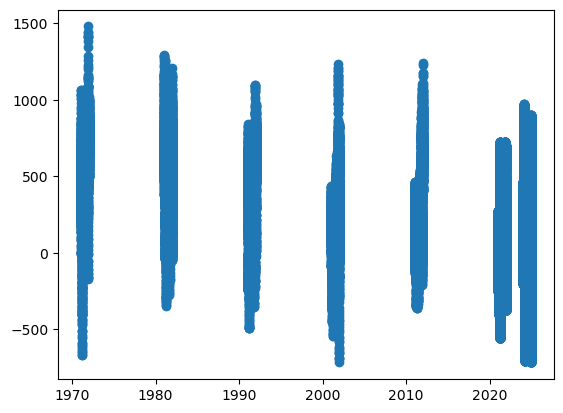

In [8]:
# Leppäluoto
# Yli miljoona mittapistettä, ensin karkeasti kuvattuna.

plt.scatter(leppa["Aika"], leppa["N2000-järjestelmässä [mm]"])

plt.show()

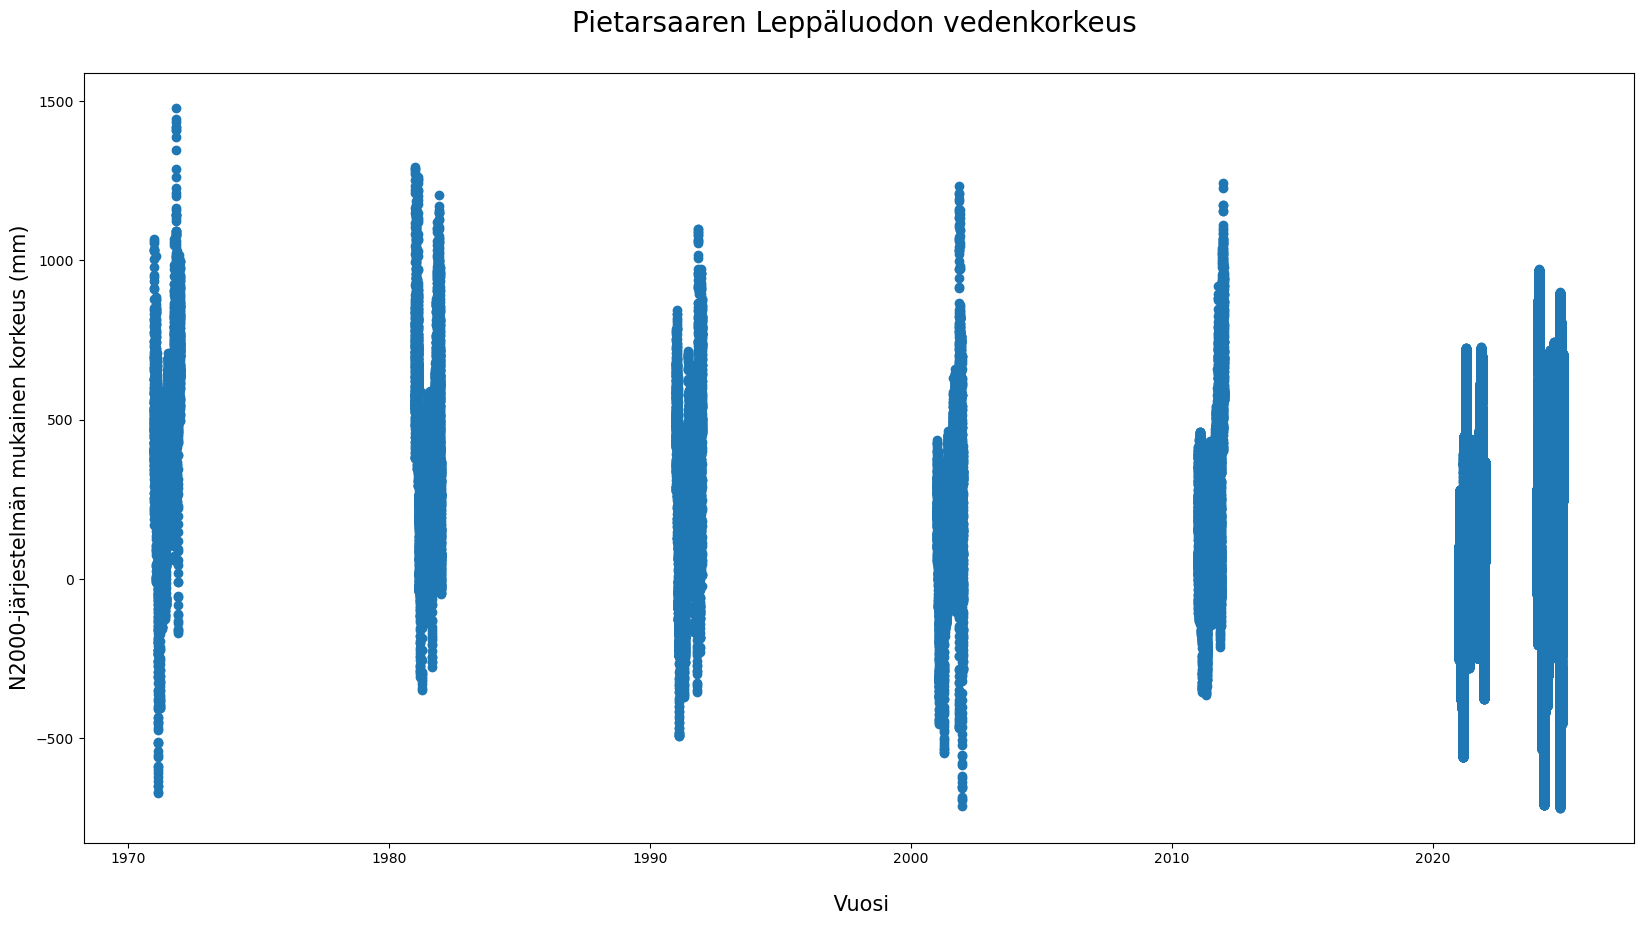

In [17]:
# Sama hieman selkeämmin.

plt.figure(figsize = (20,10))
plt.scatter(leppa["Aika"], leppa["N2000-järjestelmässä [mm]"])

plt.title("Pietarsaaren Leppäluodon vedenkorkeus \n", fontsize = 20)
plt.ylabel("N2000-järjestelmän mukainen korkeus (mm)", fontsize = 15)
plt.xlabel("\n Vuosi", fontsize = 15)
plt.show()

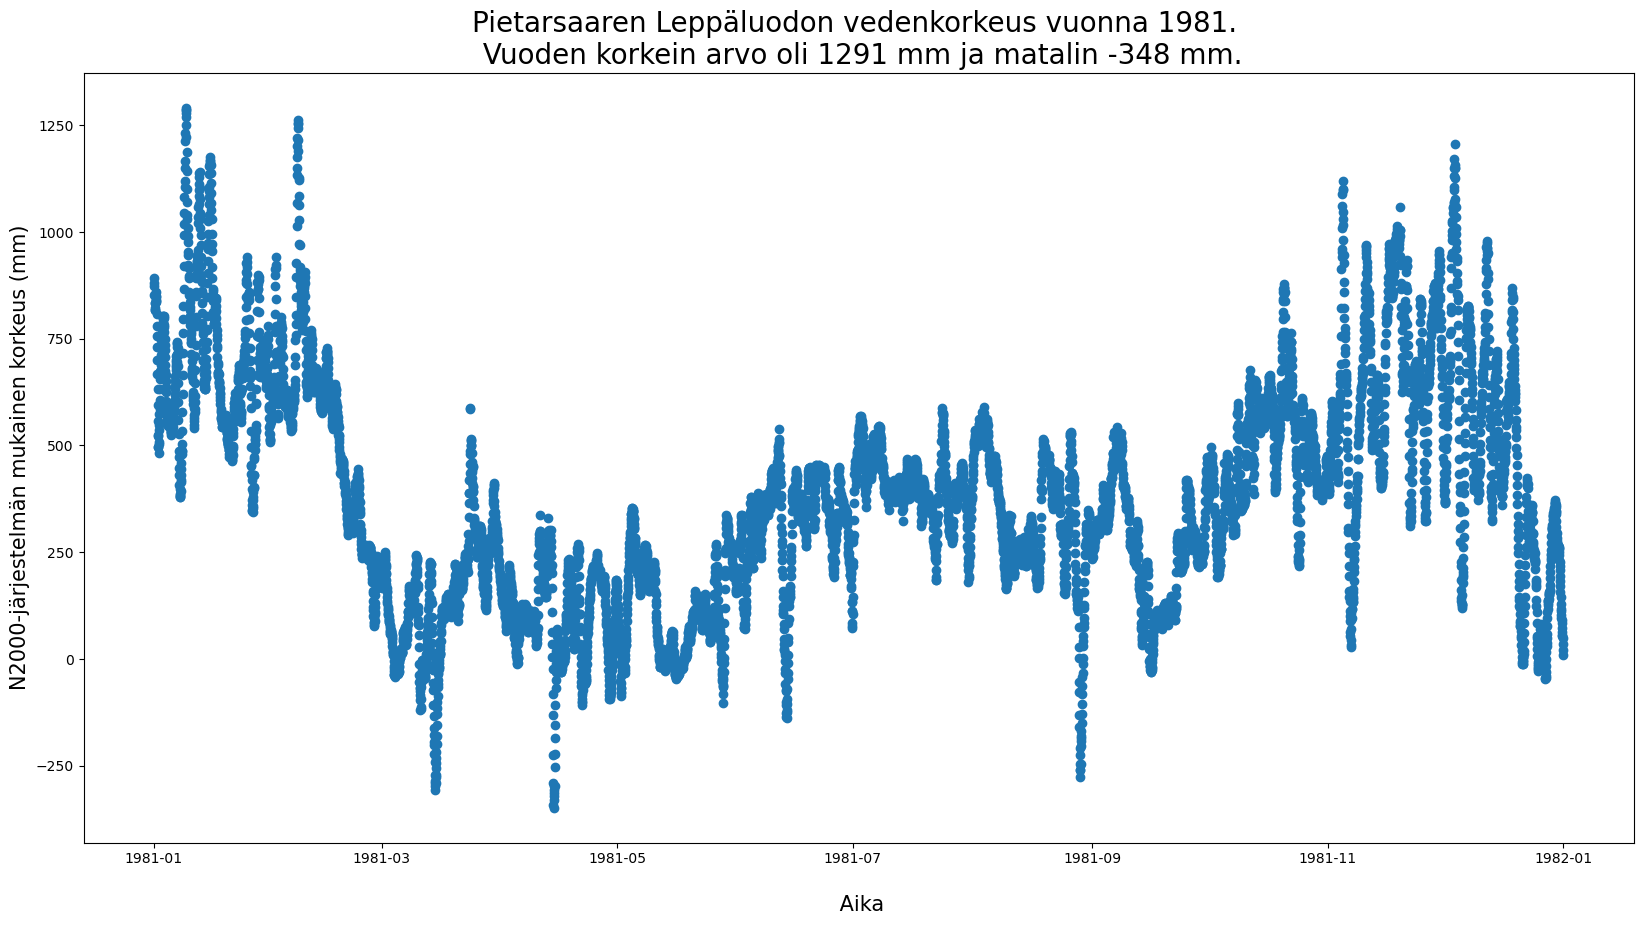

In [9]:
# Mittapisteitä on niin paljon, että eritellään aineistoa hieman. Otetaan yksi vuosi tarkasteluun.

vuosi = 1981
valinta = leppa.query("Vuosi == @vuosi")

plt.figure(figsize = (20,10))
plt.scatter(valinta["Aika"], valinta["N2000-järjestelmässä [mm]"])

maksimi = valinta["N2000-järjestelmässä [mm]"].max()
minimi = valinta["N2000-järjestelmässä [mm]"].min()

tieto = f"Vuoden korkein arvo oli {maksimi} mm ja matalin {minimi} mm."

plt.title(f"Pietarsaaren Leppäluodon vedenkorkeus vuonna {vuosi}. \n {tieto}", fontsize = 20)
plt.ylabel("N2000-järjestelmän mukainen korkeus (mm)", fontsize = 15)
plt.xlabel("\n Aika", fontsize = 15)
plt.show()

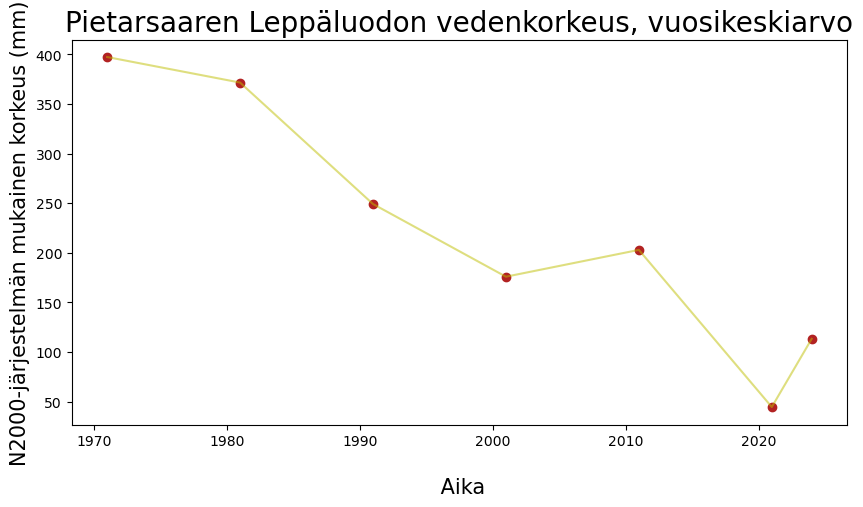

In [10]:
# Voisimme laskea myös vuosi- tai kuukausikeskiarvot.

ehto = "Vuosi"

KAV = leppa.groupby([ehto]).mean(numeric_only = True)
vaaka = leppa[ehto].unique()

plt.figure(figsize = (10, 5))

plt.plot(vaaka, KAV["N2000-järjestelmässä [mm]"], c = "y", alpha = 0.5)
plt.scatter(vaaka, KAV["N2000-järjestelmässä [mm]"], c = "firebrick")

plt.title("Pietarsaaren Leppäluodon vedenkorkeus, vuosikeskiarvo", fontsize = 20)
plt.ylabel("N2000-järjestelmän mukainen korkeus (mm)", fontsize = 15)
plt.xlabel("\n Aika", fontsize = 15)
plt.show()

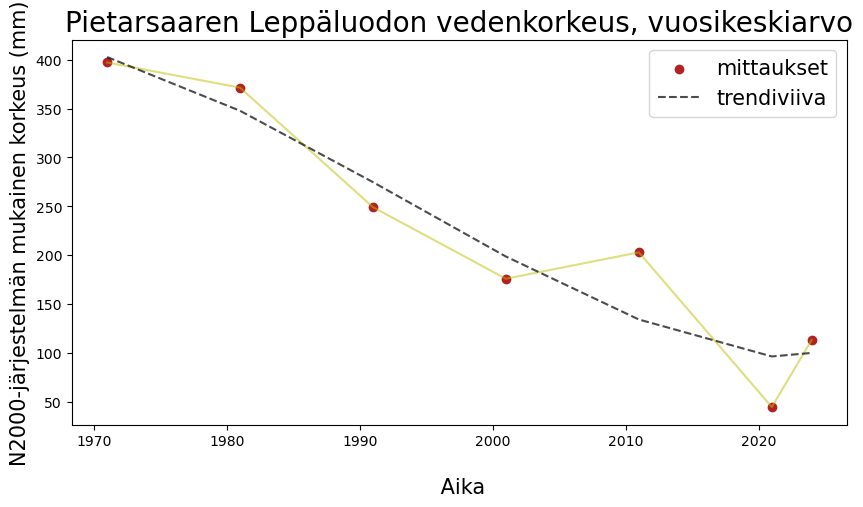

In [11]:
# Voisimme myös sovittaa havaintoihin kehitystä kuvaavan trendiviivan.

ehto = "Vuosi"

KAV = leppa.groupby([ehto]).mean(numeric_only = True)
vaaka = leppa[ehto].unique()

plt.figure(figsize = (10, 5))

plt.plot(vaaka, KAV["N2000-järjestelmässä [mm]"], c = "y", alpha = 0.5)
plt.scatter(vaaka, KAV["N2000-järjestelmässä [mm]"], c = "firebrick", label = "mittaukset")

# Trendi.
x = np.arange(len(vaaka))
y = KAV["N2000-järjestelmässä [mm]"].copy()

# Tästä lukua vaihtamalla voi muuttaa sovitetun yhtälön astetta.
z = np.polyfit(x, y, 3)
p = np.poly1d(z)
plt.plot(vaaka, p(x), c = "black", linestyle = "dashed", label = "trendiviiva", alpha = 0.7)

plt.title("Pietarsaaren Leppäluodon vedenkorkeus, vuosikeskiarvo", fontsize = 20)
plt.ylabel("N2000-järjestelmän mukainen korkeus (mm)", fontsize = 15)
plt.xlabel("\n Aika", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

### 4.2 Veden lämpötilat

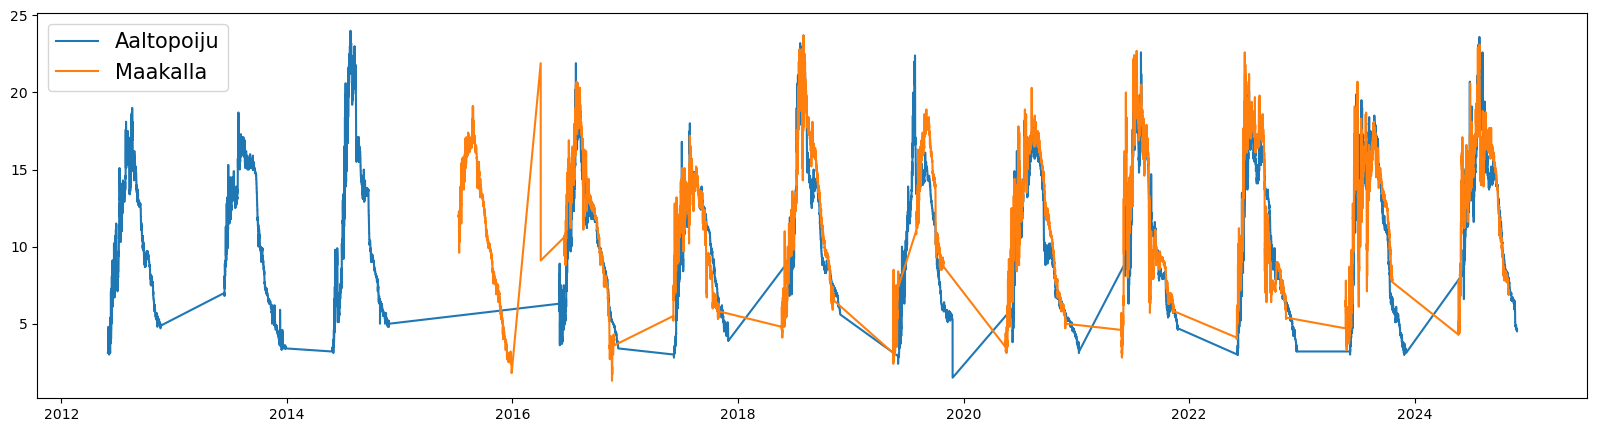

In [12]:
# Veden lämpötilat

plt.figure(figsize = (20, 5))

plt.plot(per["Aika"], per["Veden lämpötila [°C]"], label = "Aaltopoiju")
plt.plot(maak["Aika"], maak["Veden lämpötila [°C]"], label = "Maakalla")

plt.legend(fontsize = 15)
plt.show()

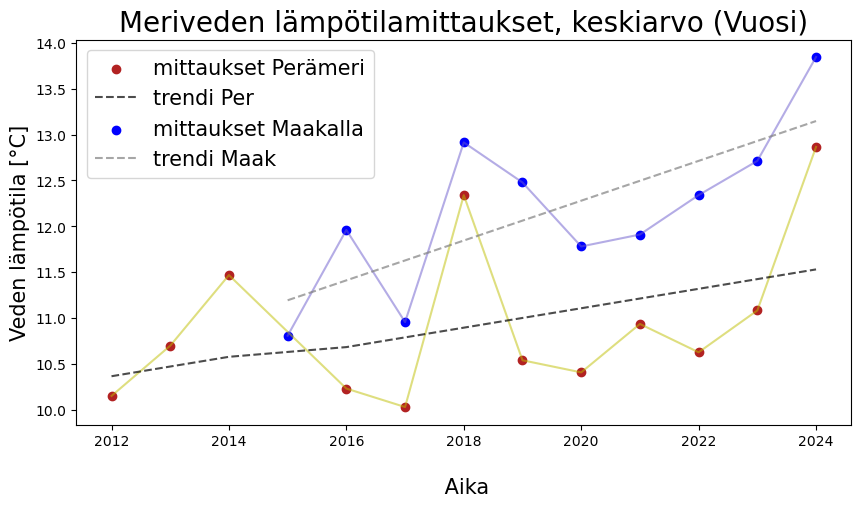

In [31]:
# Valitaan tarkasteltava ehto

ehto = "Vuosi"

plt.figure(figsize = (10, 5))

# Perämeren aaltopoiju

KAP = per.groupby([ehto]).mean(numeric_only = True)
vaaka = per[ehto].unique()

plt.plot(vaaka, KAP["Veden lämpötila [°C]"], c = "y", alpha = 0.5)
plt.scatter(vaaka, KAP["Veden lämpötila [°C]"], c = "firebrick", label = "mittaukset Perämeri")

# Trendi.
x = np.arange(len(vaaka))
y = KAP["Veden lämpötila [°C]"].copy()

# Tästä lukua vaihtamalla voi muuttaa sovitetun yhtälön astetta.
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(vaaka, p(x), c = "black", linestyle = "dashed", label = "trendi Per", alpha = 0.7)

# Kalajoen Maakalla

KAK = maak.groupby([ehto]).mean(numeric_only = True)
vaaka = maak[ehto].unique()

plt.plot(vaaka, KAK["Veden lämpötila [°C]"], c = "slateblue", alpha = 0.5)
plt.scatter(vaaka, KAK["Veden lämpötila [°C]"], c = "blue", label = "mittaukset Maakalla")

# Trendi.
x = np.arange(len(vaaka))
y = KAK["Veden lämpötila [°C]"].copy()

# Tästä lukua vaihtamalla voi muuttaa sovitetun yhtälön astetta.
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(vaaka, p(x), c = "grey", linestyle = "dashed", label = "trendi Maak", alpha = 0.7)

plt.title(f"Meriveden lämpötilamittaukset, keskiarvo ({ehto})", fontsize = 20)
plt.ylabel("Veden lämpötila [°C]", fontsize = 15)
plt.xlabel("\n Aika", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

### 4.3 Ilman lämpötilat

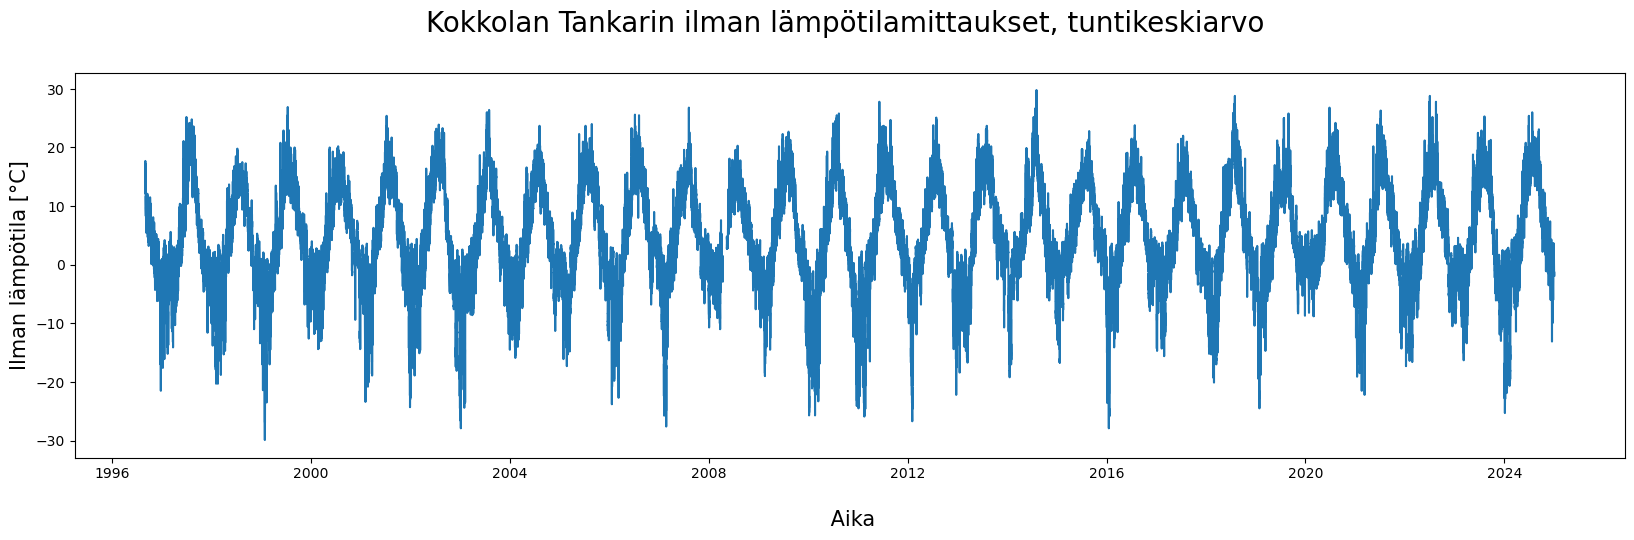

In [30]:
# Ilman lämpötilat

plt.figure(figsize = (20, 5))

# Piirretään kuvaaja
plt.plot(tank["Aika"], tank["Lämpötilan keskiarvo [°C]"])

plt.ylabel("Ilman lämpötila [°C]", fontsize = 15)
plt.xlabel("\n Aika", fontsize = 15)
plt.title("Kokkolan Tankarin ilman lämpötilamittaukset, tuntikeskiarvo \n", fontsize = 20)
plt.show()

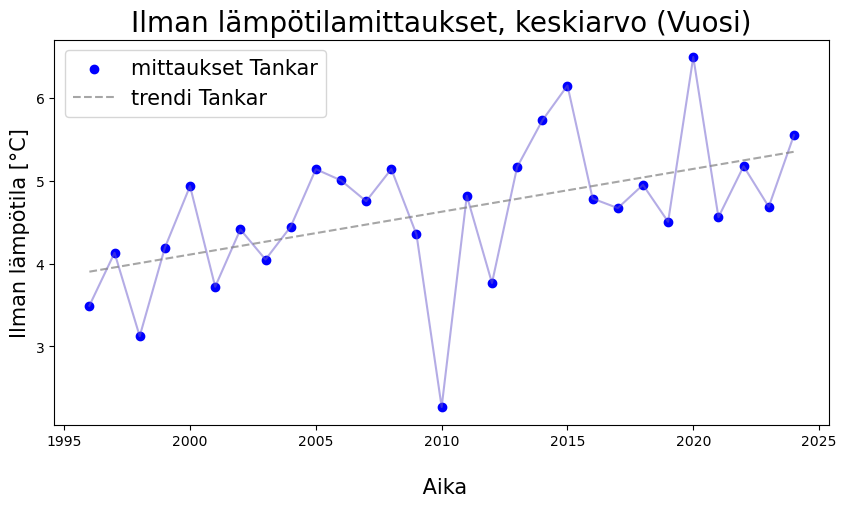

In [62]:
# Valitaan tarkasteltava ehto

ehto = "Vuosi"

plt.figure(figsize = (10, 5))

KAT = tank.groupby([ehto]).mean(numeric_only = True)
vaaka = tank[ehto].unique()

plt.plot(vaaka, KAT["Lämpötilan keskiarvo [°C]"], c = "slateblue", alpha = 0.5)
plt.scatter(vaaka, KAT["Lämpötilan keskiarvo [°C]"], c = "blue", label = "mittaukset Tankar")

# Trendi.
x = np.arange(len(vaaka))
y = KAT["Lämpötilan keskiarvo [°C]"].copy()

# Tästä lukua vaihtamalla voi muuttaa sovitetun yhtälön astetta.
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(vaaka, p(x), c = "grey", linestyle = "dashed", label = "trendi Tankar", alpha = 0.7)

plt.title(f"Ilman lämpötilamittaukset, keskiarvo ({ehto})", fontsize = 20)
plt.ylabel("Ilman lämpötila [°C]", fontsize = 15)
plt.xlabel("\n Aika", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

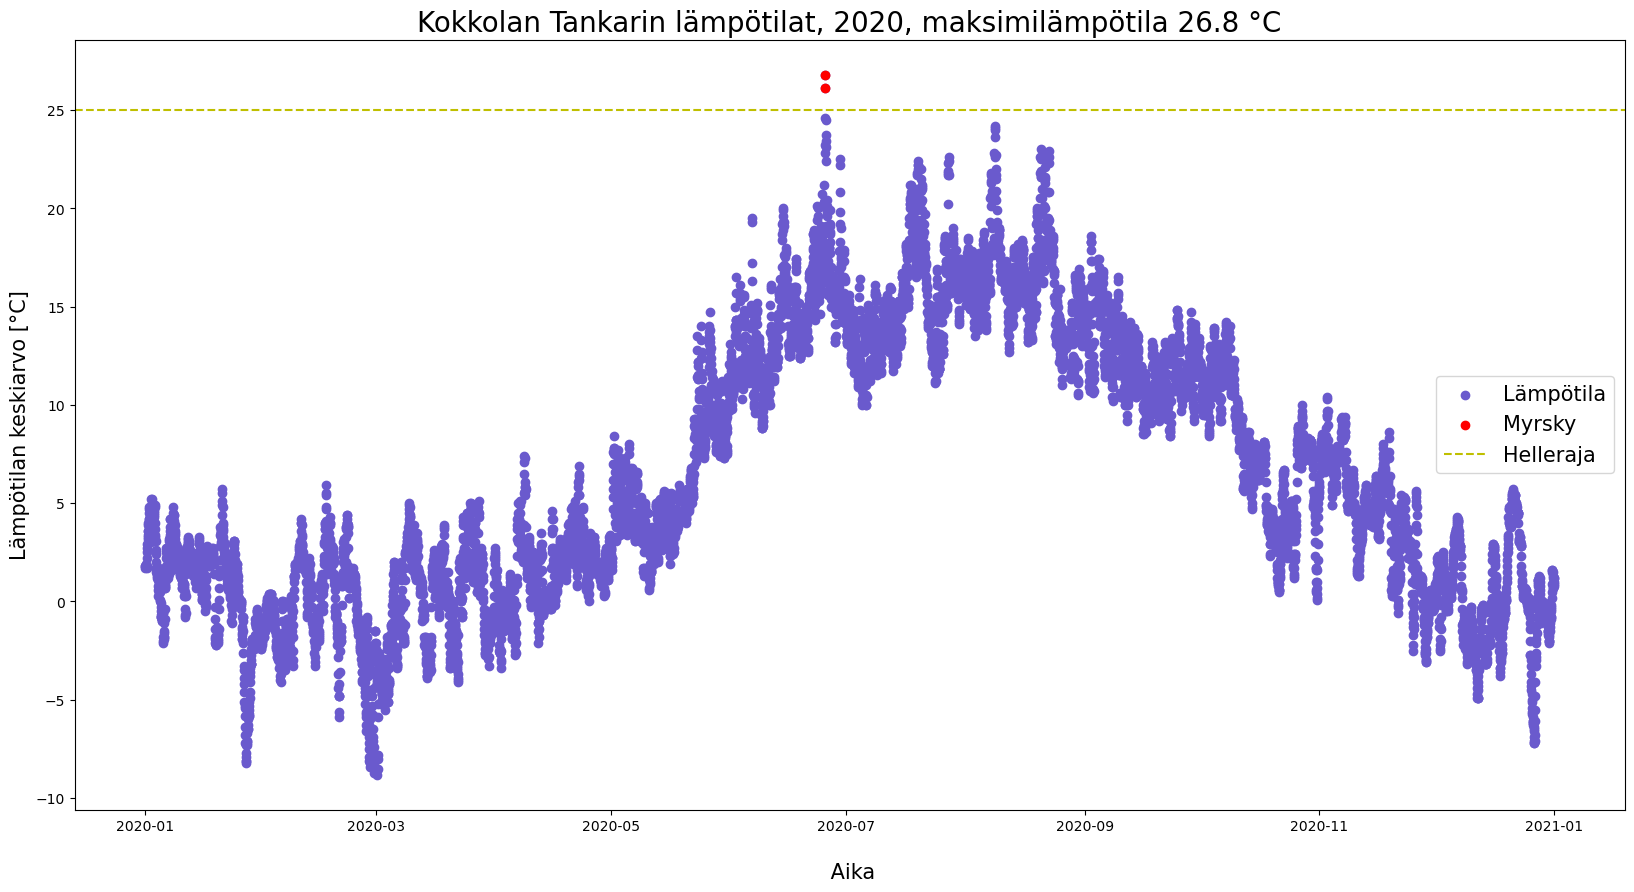

In [64]:
# Lähdetään metsästämään helteitä vaikkapa yhden vuoden ajalta

# Valitaan vuosi
vuosi = 2020
helle = 25
valinta = tank.query("Vuosi == @vuosi")
helteet = valinta.query("`Lämpötilan keskiarvo [°C]` >= @helle")
maksimi = valinta["Lämpötilan keskiarvo [°C]"].max()

# Piirretään kuvaajat
plt.figure(figsize = (20,10))

plt.scatter(valinta["Aika"], valinta["Lämpötilan keskiarvo [°C]"], c = "slateblue", label = "Lämpötila")
plt.scatter(helteet["Aika"], helteet["Lämpötilan keskiarvo [°C]"], c = "red", label = "Myrsky")
plt.axhline(y = helle, color = 'y', linestyle = 'dashed', label = "Helleraja")

plt.title(f"Kokkolan Tankarin lämpötilat, {vuosi}, maksimilämpötila {maksimi} °C", fontsize = 20)
plt.ylabel("Lämpötilan keskiarvo [°C]", fontsize = 15)
plt.xlabel("\n Aika", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

### 4.4 Tuuli

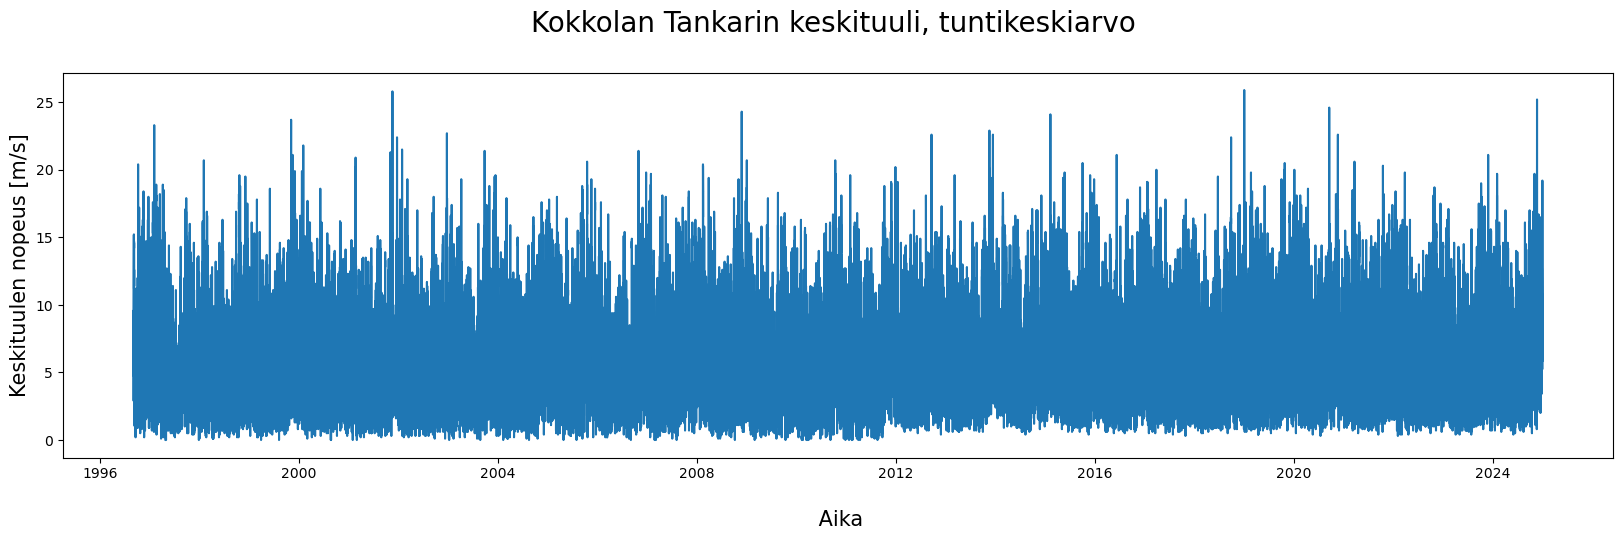

In [32]:
# Tuulen keskimääräisen nopeuden arvo
plt.figure(figsize = (20, 5))

# Piirretään kuvaaja
plt.plot(tank["Aika"], tank["Keskituulen nopeus [m/s]"])

plt.ylabel("Keskituulen nopeus [m/s]", fontsize = 15)
plt.xlabel("\n Aika", fontsize = 15)
plt.title("Kokkolan Tankarin keskituuli, tuntikeskiarvo \n", fontsize = 20)
plt.show()

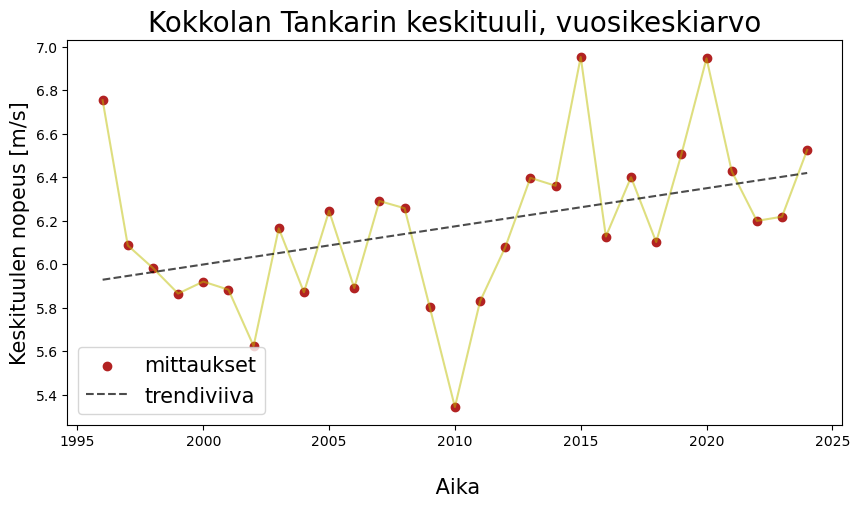

In [35]:
# Voisimme myös sovittaa havaintoihin kehitystä kuvaavan trendiviivan.

ehto = "Vuosi"

KAT = tank.groupby([ehto]).mean(numeric_only = True)
vaaka = tank[ehto].unique()

plt.figure(figsize = (10, 5))

plt.plot(vaaka, KAT["Keskituulen nopeus [m/s]"], c = "y", alpha = 0.5)
plt.scatter(vaaka, KAT["Keskituulen nopeus [m/s]"], c = "firebrick", label = "mittaukset")

# Trendi.
x = np.arange(len(vaaka))
y = KAT["Keskituulen nopeus [m/s]"].copy()

# Tästä lukua vaihtamalla voi muuttaa sovitetun yhtälön astetta.
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(vaaka, p(x), c = "black", linestyle = "dashed", label = "trendiviiva", alpha = 0.7)

plt.title("Kokkolan Tankarin keskituuli, vuosikeskiarvo", fontsize = 20)
plt.ylabel("Keskituulen nopeus [m/s]", fontsize = 15)
plt.xlabel("\n Aika", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

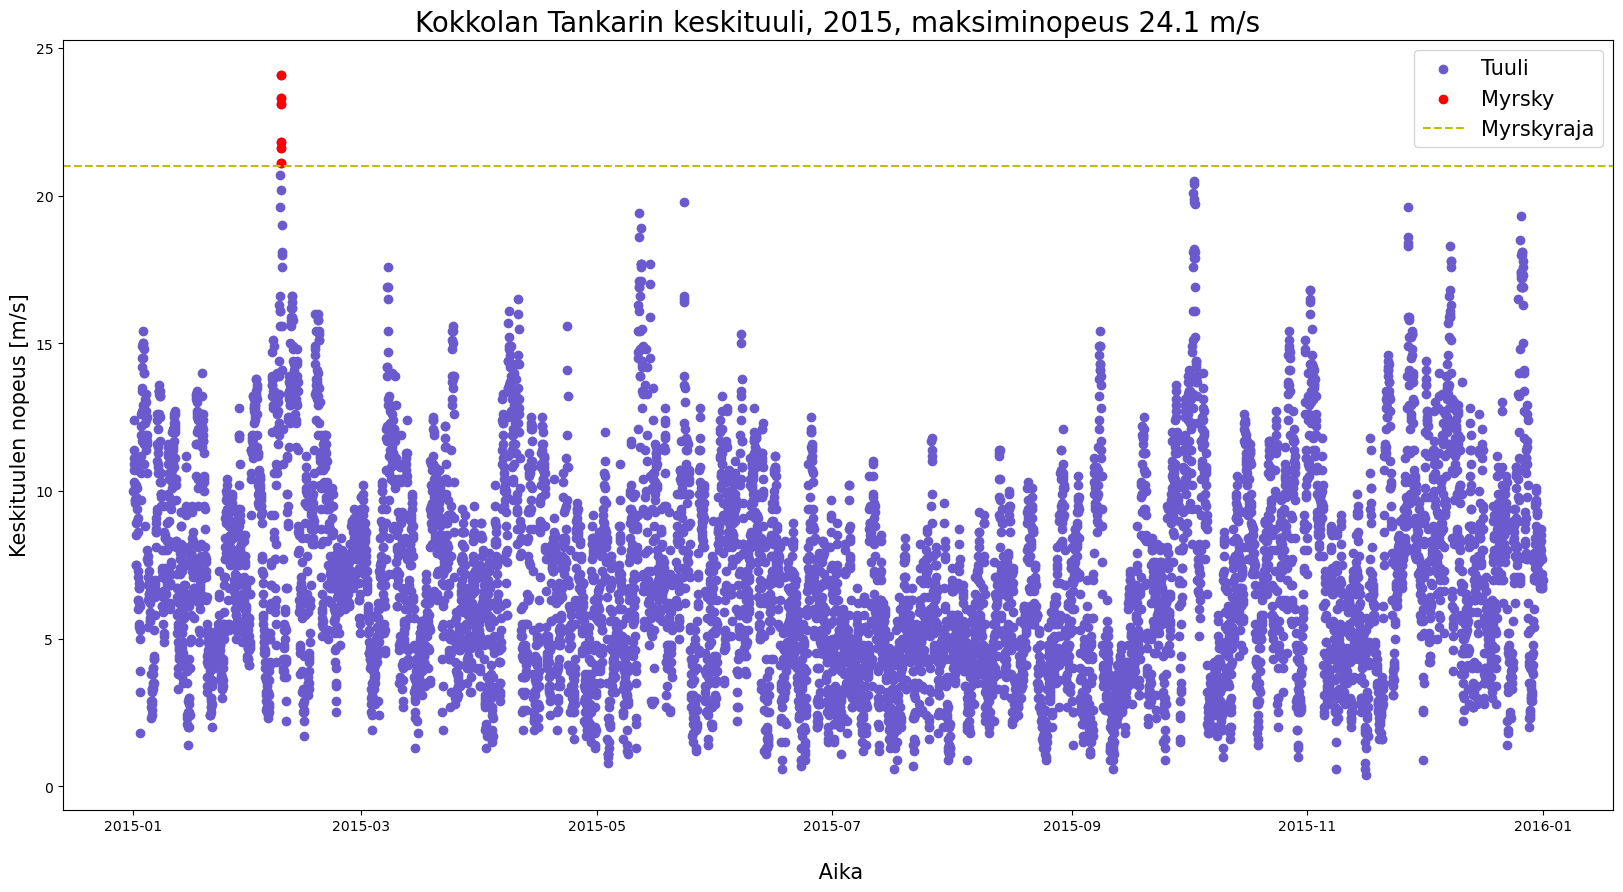

In [54]:
# Lähdetään metsästämään myrskyjä vaikkapa yhden vuoden ajalta

# Valitaan vuosi
vuosi = 2015
nopeus = 21
valinta = tank.query("Vuosi == @vuosi")
myrskyt = valinta.query("`Keskituulen nopeus [m/s]` >= @nopeus")
maksimi = valinta["Keskituulen nopeus [m/s]"].max()

# Piirretään kuvaajat
plt.figure(figsize = (20,10))

plt.scatter(valinta["Aika"], valinta["Keskituulen nopeus [m/s]"], c = "slateblue", label = "Tuuli")
plt.scatter(myrskyt["Aika"], myrskyt["Keskituulen nopeus [m/s]"], c = "red", label = "Myrsky")
plt.axhline(y = nopeus, color = 'y', linestyle = 'dashed', label = "Myrskyraja")

plt.title(f"Kokkolan Tankarin keskituuli, {vuosi}, maksiminopeus {maksimi} m/s", fontsize = 20)
plt.ylabel("Keskituulen nopeus [m/s]", fontsize = 15)
plt.xlabel("\n Aika", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

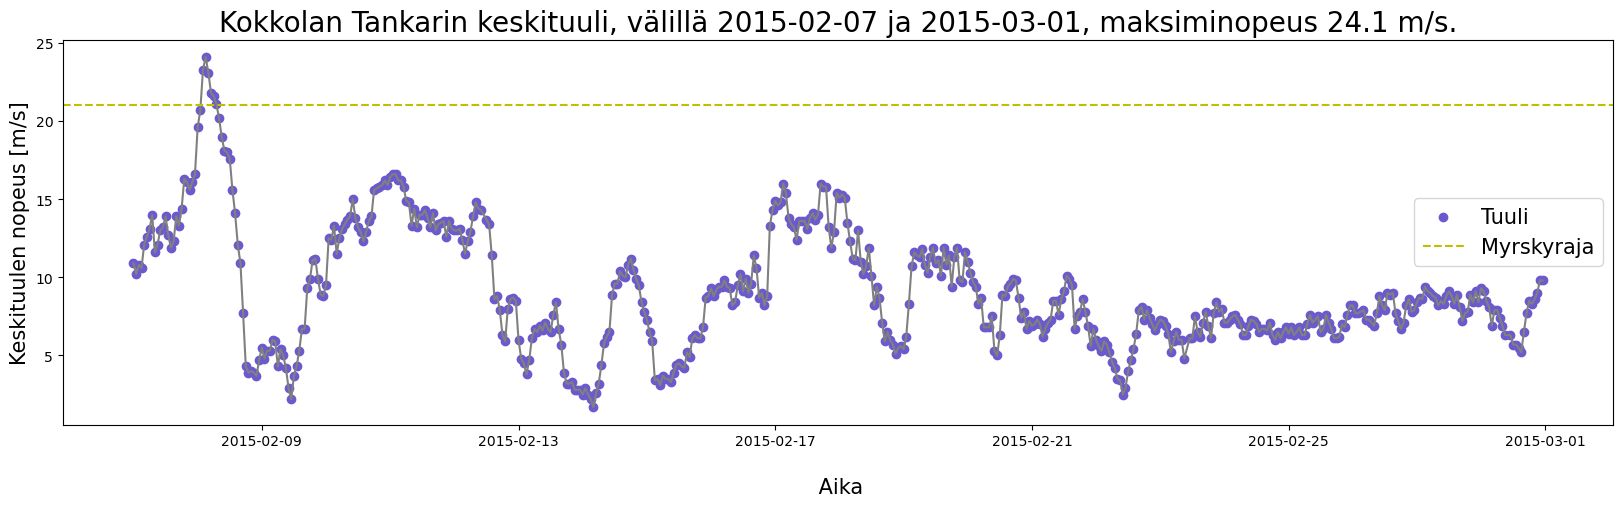

In [55]:
# Tehdään päivämäärävalitsin tarkempaa katselua varten

a = '2015-02-07'
b = '2015-03-01'
nopeus = 21
vali = tank.query("Aika >= @a & Aika < @b")

maksimi = vali["Keskituulen nopeus [m/s]"].max()

# Piirretään kuvaajat
plt.figure(figsize = (20,5))

plt.plot(vali["Aika"], vali["Keskituulen nopeus [m/s]"], c = "grey")
plt.scatter(vali["Aika"], vali["Keskituulen nopeus [m/s]"], c = "slateblue", label = "Tuuli")
plt.axhline(y = nopeus, color = 'y', linestyle = 'dashed', label = "Myrskyraja")

plt.title(f"Kokkolan Tankarin keskituuli, välillä {a} ja {b}, maksiminopeus {maksimi} m/s.", fontsize = 20)
plt.ylabel("Keskituulen nopeus [m/s]", fontsize = 15)
plt.xlabel("\n Aika", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

### 4.5 Sade ja lumi

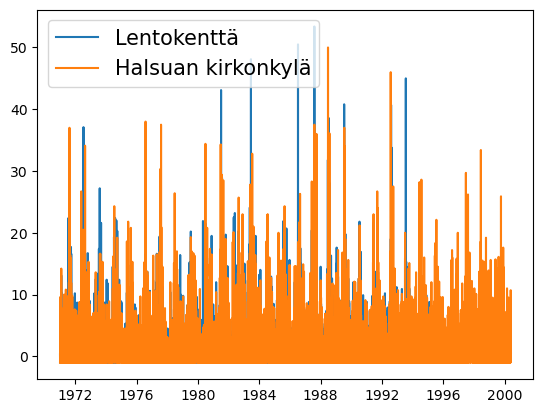

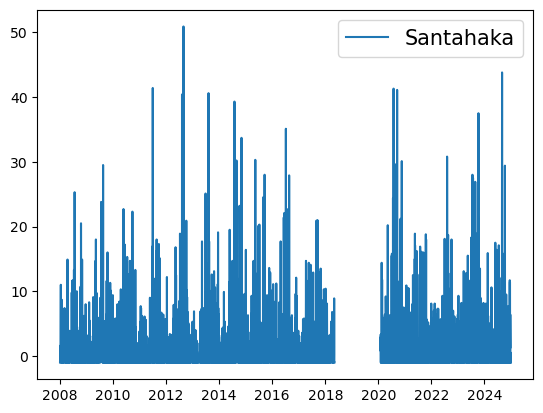

In [56]:
# Sademäärät

plt.plot(lento["Aika"], lento["Sademäärä [mm]"], label = "Lentokenttä")
plt.plot(hal["Aika"], hal["Sademäärä [mm]"], label = "Halsuan kirkonkylä")
plt.legend(fontsize = 15)
plt.show()

plt.plot(sant["Aika"], sant["Sademäärä [mm]"], label = "Santahaka")
plt.legend(fontsize = 15)
plt.show()